In [13]:
import os, warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.python.client import device_lib

from tensorflow import keras
from tensorflow.keras import layers

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

In [4]:
from tensorflow.python.client import device_lib
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")
print(device_lib.list_local_devices())

GPU is available
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5796763021508235765
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 22149922816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15257920232851702166
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:09:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-02-25 15:26:44.361577: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:26:44.365309: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:26:44.365461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:26:44.366262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [6]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

/tmp/ipykernel_27700/3251733192.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [10]:
# Load data
import pandas as pd
red_wine = pd.read_csv('./datasets/red-wine.csv')
print(red_wine.shape)
red_wine.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
# Define a linear model

# Input shape is 11 because there are 12 parameters, and we are trying to predict one of them
# So we exclude that parameter from the input

model = keras.Sequential(
    [
        layers.Dense(units=1, input_shape=[11])
    ]
)

2023-02-25 15:37:10.188781: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:37:10.188962: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:37:10.189073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:37:10.189232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-25 15:37:10.189356: I tensorflow/compiler/xla/stream_executo

In [15]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

# Note that the weights are set randomly before training.
# There is one weight and one bias for each input

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.41028017],
       [ 0.4809193 ],
       [ 0.36494344],
       [-0.23598576],
       [-0.21383727],
       [-0.2909685 ],
       [ 0.40482944],
       [-0.47966215],
       [-0.6225081 ],
       [-0.10113645],
       [ 0.48577434]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


## Untrained linear model

4/4 [==============================] - 0s 862us/step


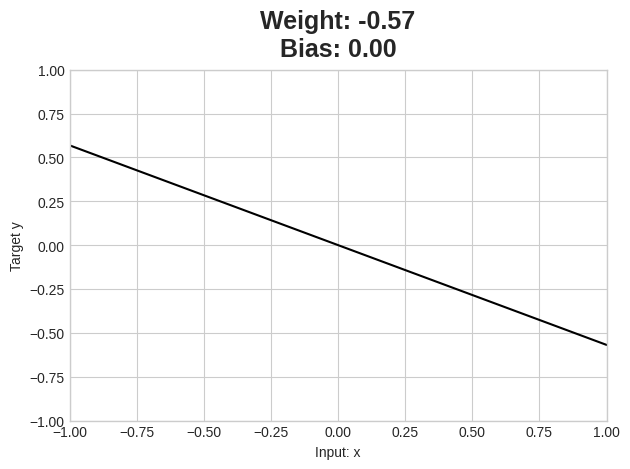

In [25]:
# Here is an untrained linear model. Run it repeatedly to show that it
# just randomly assigns weights to begin with

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## Building a sequential network

First layer gets the input

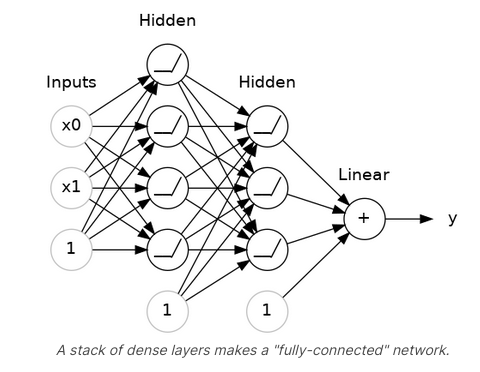

In [26]:
model = keras.Sequential([
    # Hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # linear output layer
    layers.Dense(units=1)
])

## Build DNN with several hidden layers

In [29]:
import pandas as pd

concrete = pd.read_csv('./datasets/concrete.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [31]:
# Model with dense layers with 512 units

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[8]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),    
    layers.Dense(1),
])

## Separating Dense and Activation layers

In [32]:
# A lot of the time we want to add layers between the dense layer and its activation
# We can separate the dense layer from the activation like this:

model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.Activation('relu'),
    layers.Dense(1),
])

## Different activations

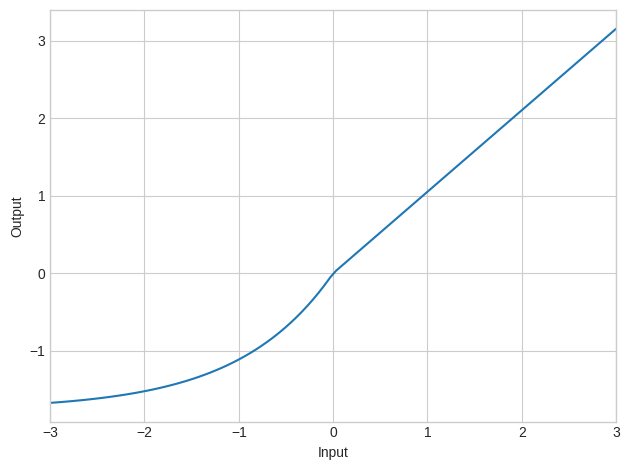

In [33]:
#'relu', 'elu', 'selu', 'swish'
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

# Stochastic Gradient Descent

To train a network, we will need:
- The model
- The training data
- A loss function
- An optimiser

## The loss function

A common one is MAE - (mean absolute error). For each prediciton, `y_pred`, it measures the disparity
from the target value `y_true` by an absolute difference `abs(y_true - y_pred)`.
Total MAE loss on a dataset is the mean of these distribution differences.

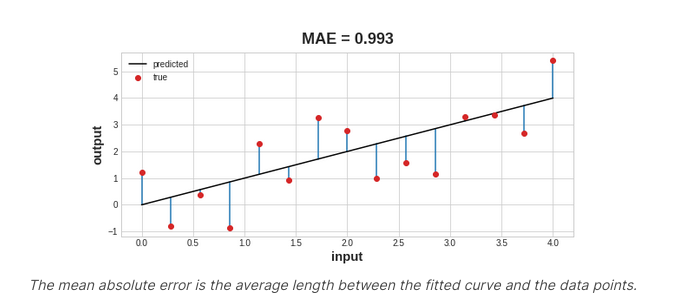

## The optimiser - Stochastic gradient descent
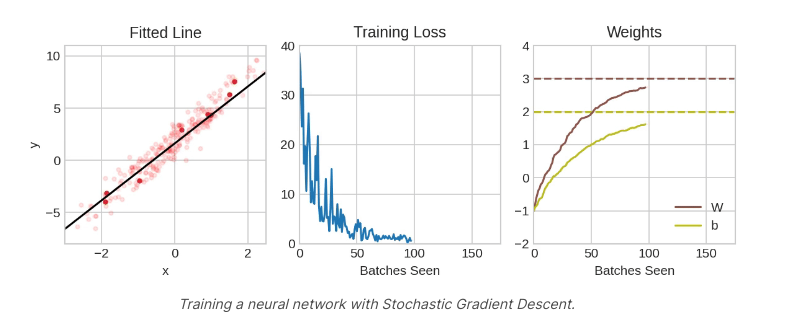

After defining a model, we can compile it and add an optimiser:

In [34]:
model.compile(
    optimizer="adam",
    loss="mae"
)

## Red wine quality

In [90]:
red_wine = pd.read_csv('./datasets/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
X_train = np.array(X_train)
X_valid = np.array(X_valid)
y_train = np.array(df_train['quality'])
y_valid = np.array(df_valid['quality'])

# display(X_train.head(4))
# display(X_valid.head(4))
# display(y_train.head(4))
# display(y_valid.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [91]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [92]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [93]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [94]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 31ms/step - loss: 0.2616 - val_loss: 0.1386
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1410 - val_loss: 0.1245
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 0.1221 - val_loss: 0.1197
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1161 - val_loss: 0.1083
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1103 - val_loss: 0.1065
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1051 - val_loss: 0.1016
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1033 - val_loss: 0.1003
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1014 - val_loss: 0.1024
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1003 - val_loss: 0.0994
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0984 - val_loss: 0.1010


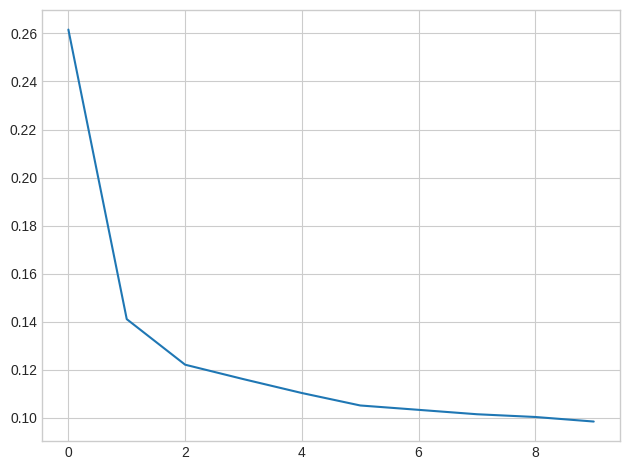

In [95]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

## Concrete strength

In [201]:
data = pd.read_csv('./datasets/concrete.csv')

# Create training and validation splits
data_final_eval = data.sample(frac=0.2, random_state=0)
max_ = data_final_eval.max(axis=0)
min_ = data_final_eval.min(axis=0)
data_final_eval = (data_final_eval - min_) / (max_ - min_)
print('data final eval')
display(data_final_eval.head(4))
print('----')
df_train = data.drop(data_final_eval.index)
df_valid = data.drop(data_final_eval.index).drop(df_train.index)

display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)


print('df valid')
display(df_valid.head(4))
print('----')
df_valid_copy = df_valid.copy()

# Split features and target
X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

display(X_train.head(4))
display(X_valid.head(4))
display(y_train.head(4))
display(y_valid.head(4))

X_train = np.array(X_train)
X_valid = np.array(X_valid)
y_train = np.array(y_train)
y_valid = np.array(y_valid)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)


data final eval


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
747,0.908676,0.000000,0.0,0.610141,0.000000,0.972097,0.047667,0.000000,0.287569
718,0.047032,0.581778,0.0,0.639235,0.000000,0.471647,0.517060,0.011050,0.077345
175,0.594977,0.597912,0.0,0.318371,0.360248,0.431143,0.405921,0.243094,1.000000
828,0.958904,0.000000,0.0,0.161264,0.000000,0.285029,0.757652,0.069061,0.942326


----


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03


df valid


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength


----


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264
5,0.374429,0.317195,0.0,0.848243,0.00000,0.380814,0.190667,0.244505


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age


0    0.967485
3    0.482372
4    0.522860
5    0.556871
Name: CompressiveStrength, dtype: float64

Series([], Name: CompressiveStrength, dtype: float64)

(824, 8)
(0, 8)
(824,)
(0,)


In [195]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[8]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [196]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [197]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
4/4 [==============================] - 1s 15ms/step - loss: 0.2694
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1559
Epoch 3/20
4/4 [==============================] - 0s 9ms/step - loss: 0.1370
Epoch 4/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1276
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.1167
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1119
Epoch 7/20
4/4 [==============================] - 0s 8ms/step - loss: 0.1022
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 0.0970
Epoch 9/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0893
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0827
Epoch 11/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0796
Epoch 12/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0751
Epoch 13/20
4/4 [==============================] - 0s 8ms/step - loss: 

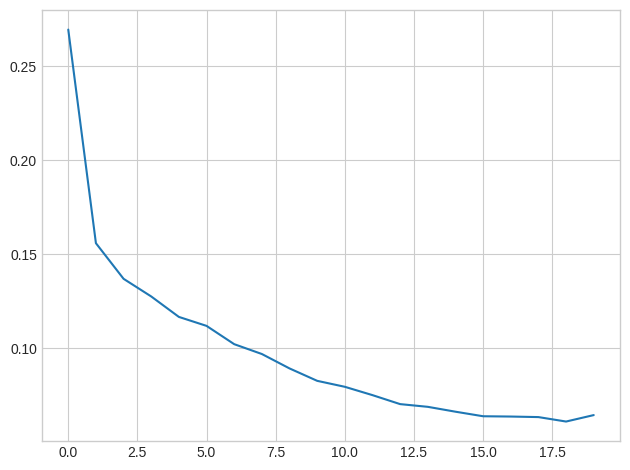

In [198]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

In [206]:
# display(data_final_eval.head(4))
# final_eval_predict = data_final_eval.drop('CompressiveStrength', axis=1)

data_eval = df_train.iloc[0:10]

display(df_train.head(4))

final_eval_predict = data_eval.drop('CompressiveStrength', axis=1)
display(final_eval_predict.head(4))

for row in range(len(final_eval_predict)):
    eval = final_eval_predict.iloc[row]
    # print(eval)
    eval = np.array([eval])
    # print(eval)

    # prediction_input = np.array([[500.0, 0.0, 0.0, 200.0, 0.0, 1125.0, 613.0, 3]])

    # results = model.evaluate(np.array(final_eval_predict))
    results = model.predict(eval)
    print(data_final_eval.iloc[row]['CompressiveStrength'])
    print(results)
    print(f"{np.abs(results - data_eval.iloc[row]['CompressiveStrength']) * 100 / data_final_eval.iloc[row]['CompressiveStrength']} %")

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860
5,0.374429,0.317195,0.0,0.848243,0.00000,0.380814,0.190667,0.244505,0.556871


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264
5,0.374429,0.317195,0.0,0.848243,0.00000,0.380814,0.190667,0.244505


1/1 [==============================] - 0s 48ms/step
0.28756858022213305
[[0.8450085]]
[[42.590263]] %
1/1 [==============================] - 0s 21ms/step
0.07734510905928008
[[0.5586053]]
[[98.56257]] %
1/1 [==============================] - 0s 22ms/step
1.0
[[0.49183428]]
[[3.1026065]] %
1/1 [==============================] - 0s 20ms/step
0.9423257058744814
[[0.5179481]]
[[4.1304708]] %
1/1 [==============================] - 0s 21ms/step
0.06851331459922387
[[0.55245024]]
[[54.098495]] %
1/1 [==============================] - 0s 21ms/step
0.5691154824033187
[[0.47765073]]
[[9.239836]] %
1/1 [==============================] - 0s 22ms/step
0.7283554128194836
[[0.5043497]]
[[6.0277863]] %
1/1 [==============================] - 0s 29ms/step
0.24287434765154559
[[0.47535878]]
[[12.397971]] %
1/1 [==============================] - 0s 28ms/step
0.7670279673491236
[[0.32680118]]
[[0.880846]] %
1/1 [==============================] - 0s 28ms/step
0.6362906463267765
[[0.55720836]]
[[7.9238625]] 

## Fuel economy

In [51]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

/tmp/ipykernel_27700/2426236682.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('./datasets/fuel.csv')

print(fuel.head())

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

   EngDispl  NumCyl Transmission       FE AirAspirationMethod  NumGears  \
0       4.7       8          AM6  28.0198  NaturallyAspirated         6   
1       4.7       8           M6  25.6094  NaturallyAspirated         6   
2       4.2       8           M6  26.8000  NaturallyAspirated         6   
3       4.2       8          AM6  25.0451  NaturallyAspirated         6   
4       5.2      10          AM6  24.8000  NaturallyAspirated         6   

   TransLockup  TransCreeperGear          DriveDesc  IntakeValvePerCyl  \
0            1                 0  TwoWheelDriveRear                  2   
1            1                 0  TwoWheelDriveRear                  2   
2            1                 0      AllWheelDrive                  2   
3            1                 0      AllWheelDrive                  2   
4            0                 0      AllWheelDrive                  2   

   ExhaustValvesPerCyl CarlineClassDesc  VarValveTiming  VarValveLift  
0                    2         2

/home/sylvia/anaconda3/envs/deep-learn/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [57]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [58]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200
)

Epoch 1/200


2023-02-25 17:21:42.900094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-25 17:21:43.022850: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe8fc006690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-25 17:21:43.022871: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-02-25 17:21:43.060340: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-25 17:21:43.413722: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 27ms/step - loss: 2.7680
Epoch 2/200
9/9 [==============================] - 0s 27ms/step - loss: 1.0178
Epoch 3/200
9/9 [==============================] - 0s 25ms/step - loss: 0.5716
Epoch 4/200
9/9 [==============================] - 0s 26ms/step - loss: 0.3645
Epoch 5/200
9/9 [==============================] - 0s 26ms/step - loss: 0.2426
Epoch 6/200
9/9 [==============================] - 0s 26ms/step - loss: 0.1906
Epoch 7/200
9/9 [==============================] - 0s 28ms/step - loss: 0.1468
Epoch 8/200
9/9 [==============================] - 0s 26ms/step - loss: 0.1185
Epoch 9/200
9/9 [==============================] - 0s 29ms/step - loss: 0.1005
Epoch 10/200
9/9 [==============================] - 0s 25ms/step - loss: 0.0939
Epoch 11/200
9/9 [==============================] - 0s 26ms/step - loss: 0.0870
Epoch 12/200
9/9 [==============================] - 0s 28ms/step - loss: 0.0748
Epoch 13/200
9/9 [==============================] - 0s 26ms/s

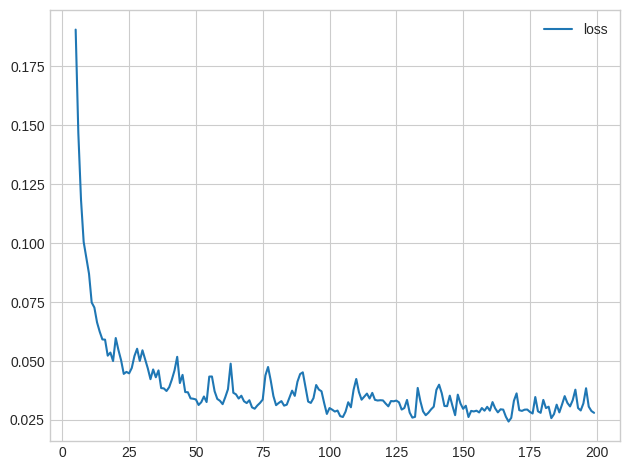

In [59]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In general, smaller batch sizes give noisier weight updates and loss curves.

Smaller learning rates make the updates smaller and the training takes longer to converge.
Large learning rates can speed up training but don't settle down to a minimum as well.